## Moving averages

We will explore the most fundamental time series forecasting model — simple moving averages (MA).

## Assumptions:

The basic assumption behind averaging and smoothing models is that the time series is locally stationary with a slowly varying mean. Hence, we take a moving (local) average to estimate the current value of the mean and then use that as the forecast for the near future.

A moving average is often called a "smoothed" version of the original series because short-term averaging has the effect of smoothing out the bumps in the original series. By adjusting the degree of smoothing (the width of the moving average), we can hope to strike some kind of optimal balance between the performance of the mean and random walk models.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
def parse(x):
	return datetime.strptime(x, '%Y-%m')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/luckyrabbit85/Time-Series/main/data/airline-passengers.csv', parse_dates = ['Month'],date_parser=parse)
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [4]:
df.columns = ["Date", "Passenger_Count"]
df.head()

,Date,Passenger_Count
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             144 non-null    datetime64[ns]
 1   Passenger_Count  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [6]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("Features : " ,df.columns.tolist())
print ("Missing values :\n", df.isnull().any())
print ("Unique values :\n",df.nunique())

Rows     :  144
Columns  :  2
Features :  ['Date', 'Passenger_Count']
Missing values :
 Date               False
Passenger_Count    False
dtype: bool
Unique values :
 Date               144
Passenger_Count    118
dtype: int64


In [7]:
df = df.set_index("Date")

In [8]:
df.head()

,Passenger_Count
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Passenger_Count,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


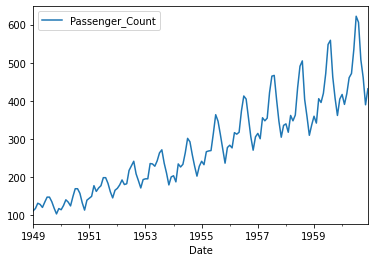

In [10]:
df.plot()

Simple moving average = (t + (t-1) + (t-2) + ... + (t-n)) / n

In [11]:
df = df["1955":"1957"][["Passenger_Count"]]

In [12]:
df['Passenger_Count'].rolling(window=3).mean()

Date
1955-01-01           NaN
1955-02-01           NaN
1955-03-01    247.333333
1955-04-01    256.333333
1955-05-01    268.666667
1955-06-01    284.666667
1955-07-01    316.333333
1955-08-01    342.000000
1955-09-01    341.000000
1955-10-01    311.000000
1955-11-01    274.333333
1955-12-01    263.000000
1956-01-01    266.333333
1956-02-01    279.666667
1956-03-01    292.666667
1956-04-01    302.333333
1956-05-01    316.000000
1956-06-01    335.000000
1956-07-01    368.333333
1956-08-01    397.333333
1956-09-01    391.000000
1956-10-01    355.333333
1956-11-01    310.666667
1956-12-01    294.333333
1957-01-01    297.333333
1957-02-01    307.333333
1957-03-01    324.000000
1957-04-01    335.000000
1957-05-01    353.000000
1957-06-01    375.000000
1957-07-01    414.000000
1957-08-01    451.333333
1957-09-01    445.333333
1957-10-01    406.000000
1957-11-01    352.000000
1957-12-01    329.333333
Name: Passenger_Count, dtype: float64

In [13]:
df['ma_rolling_3']=df['Passenger_Count'].rolling(window=3).mean().shift(1)

In [14]:
df

,Passenger_Count,ma_rolling_3
Date,,
1955-01-01,242,NaN
1955-02-01,233,NaN
1955-03-01,267,NaN
1955-04-01,269,247.333333
1955-05-01,270,256.333333
1955-06-01,315,268.666667
1955-07-01,364,284.666667
1955-08-01,347,316.333333
1955-09-01,312,342.000000


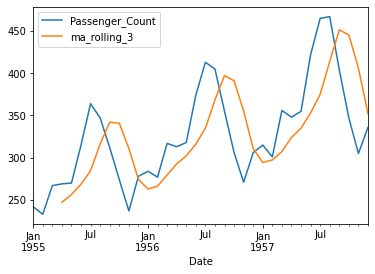

In [15]:
df.plot();

Weighted moving average = (t * weighting factor) + ((t-1) * weighting factor-1) + ((t-n) * weighting factor-n)/n 

In [16]:
def weighted_moving_average(weights): 
  def calc(x):
    return (weights*x).mean()
  return calc

In [17]:
df['Passenger_Count'].rolling(window=3).apply(weighted_moving_average(np.array([0.5,1,1.5])))

Date
1955-01-01           NaN
1955-02-01           NaN
1955-03-01    251.500000
1955-04-01    262.333333
1955-05-01    269.166667
1955-06-01    292.333333
1955-07-01    332.000000
1955-08-01    347.333333
1955-09-01    332.333333
1955-10-01    298.833333
1955-11-01    261.833333
1955-12-01    263.666667
1956-01-01    274.166667
1956-02-01    279.500000
1956-03-01    298.166667
1956-04-01    308.333333
1956-05-01    316.166667
1956-06-01    345.166667
1956-07-01    384.166667
1956-08-01    402.500000
1956-09-01    381.333333
1956-10-01    338.833333
1956-11-01    296.666667
1956-12-01    294.333333
1957-01-01    304.666667
1957-02-01    306.500000
1957-03-01    330.833333
1957-04-01    342.833333
1957-05-01    352.833333
1957-06-01    387.333333
1957-07-01    432.333333
1957-08-01    458.833333
1957-09-01    435.166667
1957-10-01    386.000000
1957-11-01    335.500000
1957-12-01    327.500000
Name: Passenger_Count, dtype: float64

In [18]:
df['wma_rolling_3']=df['Passenger_Count'].rolling(window=3).apply(weighted_moving_average(np.array([0.5,1,1.5]))).shift(1)

In [19]:
df

,Passenger_Count,ma_rolling_3,wma_rolling_3
Date,,,
1955-01-01,242,NaN,NaN
1955-02-01,233,NaN,NaN
1955-03-01,267,NaN,NaN
1955-04-01,269,247.333333,251.500000
1955-05-01,270,256.333333,262.333333
1955-06-01,315,268.666667,269.166667
1955-07-01,364,284.666667,292.333333
1955-08-01,347,316.333333,332.000000
1955-09-01,312,342.000000,347.333333


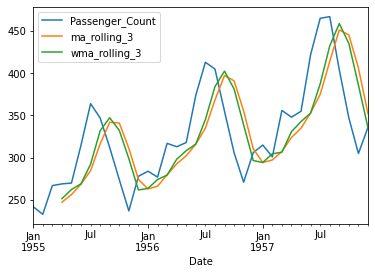

In [20]:
df.plot()

Looking at the above visualization uncovers a couple of problems with simple moving averages:

+ **Lag** - moving average time series always lags from the original one. Look at the peaks to verify that claim.
+ **Noise** - too small sliding window size won’t remove all noise from the original data.
+ **Averaging issue** - averaged data will never capture the low and high points of the original series due to, well, averaging.
+ **Weighting** - identical weights are assigned to all data points. This can be an issue as frequently the most recent values have more impact on the future.

Exponential moving average = (Close - previous EMA) * (2/(span+1)) + previous EMA


In [21]:
df['Passenger_Count'].ewm(span=3, adjust=False, min_periods=0).mean()

Date
1955-01-01    242.000000
1955-02-01    237.500000
1955-03-01    252.250000
1955-04-01    260.625000
1955-05-01    265.312500
1955-06-01    290.156250
1955-07-01    327.078125
1955-08-01    337.039062
1955-09-01    324.519531
1955-10-01    299.259766
1955-11-01    268.129883
1955-12-01    273.064941
1956-01-01    278.532471
1956-02-01    277.766235
1956-03-01    297.383118
1956-04-01    305.191559
1956-05-01    311.595779
1956-06-01    342.797890
1956-07-01    377.898945
1956-08-01    391.449472
1956-09-01    373.224736
1956-10-01    339.612368
1956-11-01    305.306184
1956-12-01    305.653092
1957-01-01    310.326546
1957-02-01    305.663273
1957-03-01    330.831637
1957-04-01    339.415818
1957-05-01    347.207909
1957-06-01    384.603955
1957-07-01    424.801977
1957-08-01    445.900989
1957-09-01    424.950494
1957-10-01    385.975247
1957-11-01    345.487624
1957-12-01    340.743812
Name: Passenger_Count, dtype: float64

In [22]:
df['ewm_window_3']=df['Passenger_Count'].ewm(span=3, adjust=False, min_periods=0).mean().shift(1)

In [23]:
df

,Passenger_Count,ma_rolling_3,wma_rolling_3,ewm_window_3
Date,,,,
1955-01-01,242,NaN,NaN,NaN
1955-02-01,233,NaN,NaN,242.000000
1955-03-01,267,NaN,NaN,237.500000
1955-04-01,269,247.333333,251.500000,252.250000
1955-05-01,270,256.333333,262.333333,260.625000
1955-06-01,315,268.666667,269.166667,265.312500
1955-07-01,364,284.666667,292.333333,290.156250
1955-08-01,347,316.333333,332.000000,327.078125
1955-09-01,312,342.000000,347.333333,337.039062


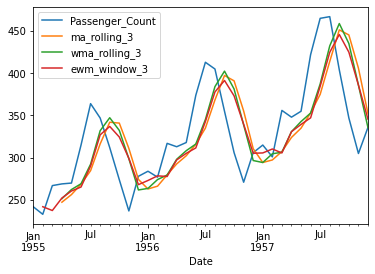

In [24]:
df.plot()

Exponential Smoothing - 

![alt text](https://people.duke.edu/~rnau/411avg_files/image028.png)

In [25]:
df['Passenger_Count'].ewm(alpha=0.7, adjust=False, min_periods=3).mean()

Date
1955-01-01           NaN
1955-02-01           NaN
1955-03-01    257.610000
1955-04-01    265.583000
1955-05-01    268.674900
1955-06-01    301.102470
1955-07-01    345.130741
1955-08-01    346.439222
1955-09-01    322.331767
1955-10-01    288.499530
1955-11-01    252.449859
1955-12-01    270.334958
1956-01-01    279.900487
1956-02-01    277.870146
1956-03-01    305.261044
1956-04-01    310.678313
1956-05-01    315.803494
1956-06-01    356.541048
1956-07-01    396.062314
1956-08-01    402.318694
1956-09-01    369.195608
1956-10-01    324.958682
1956-11-01    287.187605
1956-12-01    300.356281
1957-01-01    310.606884
1957-02-01    303.882065
1957-03-01    340.364620
1957-04-01    345.709386
1957-05-01    352.212816
1957-06-01    401.063845
1957-07-01    445.819153
1957-08-01    460.645746
1957-09-01    420.993724
1957-10-01    369.198117
1957-11-01    324.259435
1957-12-01    332.477831
Name: Passenger_Count, dtype: float64

In [26]:
df['esm_window_3_7']=df['Passenger_Count'].ewm(alpha=0.7, adjust=False,min_periods=3).mean().shift(1)

In [27]:
df

,Passenger_Count,ma_rolling_3,wma_rolling_3,ewm_window_3,esm_window_3_7
Date,,,,,
1955-01-01,242,NaN,NaN,NaN,NaN
1955-02-01,233,NaN,NaN,242.000000,NaN
1955-03-01,267,NaN,NaN,237.500000,NaN
1955-04-01,269,247.333333,251.500000,252.250000,257.610000
1955-05-01,270,256.333333,262.333333,260.625000,265.583000
1955-06-01,315,268.666667,269.166667,265.312500,268.674900
1955-07-01,364,284.666667,292.333333,290.156250,301.102470
1955-08-01,347,316.333333,332.000000,327.078125,345.130741
1955-09-01,312,342.000000,347.333333,337.039062,346.439222


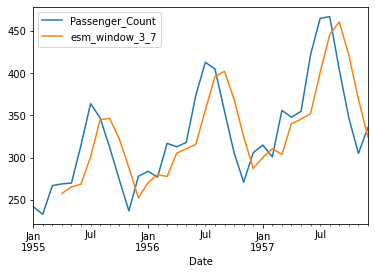

In [28]:
df[['Passenger_Count','esm_window_3_7']].plot()

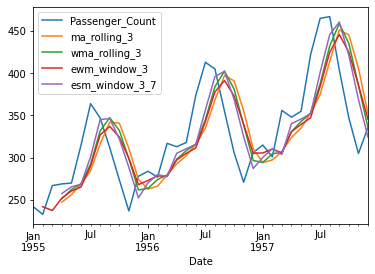

In [29]:
df.plot()

In [30]:
df['Passenger_Count'].ewm(alpha=0.3, adjust=False, min_periods=3).mean()

Date
1955-01-01           NaN
1955-02-01           NaN
1955-03-01    247.610000
1955-04-01    254.027000
1955-05-01    258.818900
1955-06-01    275.673230
1955-07-01    302.171261
1955-08-01    315.619883
1955-09-01    314.533918
1955-10-01    302.373743
1955-11-01    282.761620
1955-12-01    281.333134
1956-01-01    282.133194
1956-02-01    280.593236
1956-03-01    291.515265
1956-04-01    297.960685
1956-05-01    303.972480
1956-06-01    324.980736
1956-07-01    351.386515
1956-08-01    367.470561
1956-09-01    363.729392
1956-10-01    346.410575
1956-11-01    323.787402
1956-12-01    318.451182
1957-01-01    317.415827
1957-02-01    312.491079
1957-03-01    325.543755
1957-04-01    332.280629
1957-05-01    339.096440
1957-06-01    363.967508
1957-07-01    394.277256
1957-08-01    416.094079
1957-09-01    412.465855
1957-10-01    392.826099
1957-11-01    366.478269
1957-12-01    357.334788
Name: Passenger_Count, dtype: float64

In [31]:
df['esm_window_3_3']=df['Passenger_Count'].ewm(alpha=0.3, adjust=False,min_periods=3).mean().shift(1)

In [32]:
df

,Passenger_Count,ma_rolling_3,wma_rolling_3,ewm_window_3,esm_window_3_7,esm_window_3_3
Date,,,,,,
1955-01-01,242,NaN,NaN,NaN,NaN,NaN
1955-02-01,233,NaN,NaN,242.000000,NaN,NaN
1955-03-01,267,NaN,NaN,237.500000,NaN,NaN
1955-04-01,269,247.333333,251.500000,252.250000,257.610000,247.610000
1955-05-01,270,256.333333,262.333333,260.625000,265.583000,254.027000
1955-06-01,315,268.666667,269.166667,265.312500,268.674900,258.818900
1955-07-01,364,284.666667,292.333333,290.156250,301.102470,275.673230
1955-08-01,347,316.333333,332.000000,327.078125,345.130741,302.171261
1955-09-01,312,342.000000,347.333333,337.039062,346.439222,315.619883


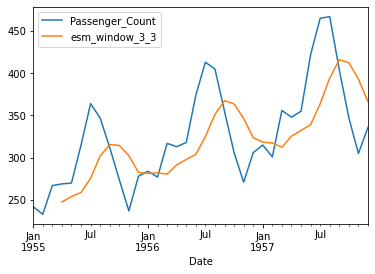

In [33]:
df[['Passenger_Count','esm_window_3_3']].plot()

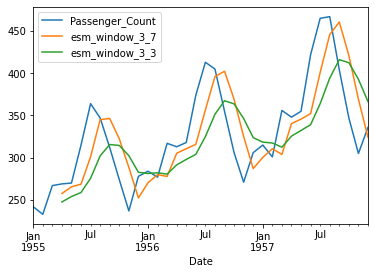

In [34]:
df[['Passenger_Count','esm_window_3_7', 'esm_window_3_3']].plot()

$RMSE = \sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

In [35]:
((df['Passenger_Count']-df['ma_rolling_3'])**2).mean()**0.5

52.88307412225133

In [36]:
((df['Passenger_Count']-df['wma_rolling_3'])**2).mean()**0.5

46.83841950885557

In [37]:
((df['Passenger_Count']-df['ewm_window_3'])**2).mean()**0.5

44.89228592555097

In [38]:
((df['Passenger_Count']-df['esm_window_3_7'])**2).mean()**0.5

41.41130578302369

In [39]:
((df['Passenger_Count']-df['esm_window_3_3'])**2).mean()**0.5

50.90401589350318